<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Clasification_Task_Support_Vector_Mchine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset : The MNIST database of handwritten digits

http://yann.lecun.com/exdb/mnist/

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

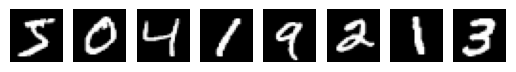

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X = np.array(X)

pos = 1
for data in X[:8]:
  plt.subplot(1, 8, pos)
  plt.imshow(data.reshape((28, 28)),
            cmap=cm.Greys_r)
  plt.axis('off')
  pos += 1

plt.show()

In [13]:
y[:8]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [15]:
# X_train = X[:60000]
# y_train = y[:60000]
# X_test = X[60000:]
# y_test = y[60000:]

X_train = X[:1000]
y_train = y[:1000]
X_test = X[69000:]
y_test = y[69000:]

#Clasification dengan SVC (Support Vector Clasifier)

In [16]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [17]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.97      0.99      0.98       119
           2       0.85      0.82      0.84        99
           3       0.97      0.87      0.92       102
           4       0.88      0.95      0.91        92
           5       0.91      0.86      0.88        85
           6       0.93      0.95      0.94       102
           7       0.92      0.94      0.93       115
           8       0.89      0.94      0.91        94
           9       0.92      0.84      0.88        90

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



#Hyperparameter Tuning dengan **GridSearchCV**

https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001]

}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [23]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters : ')

for params in parameters:
  print(f'\t{params} : {best_params[params]}')

Best Score: 0.907
Best Parameters : 
	kernel : rbf
	C : 10
	gamma : scale


#Predict & Evaluate

In [24]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.98      0.99      0.98       119
           2       0.87      0.85      0.86        99
           3       0.99      0.89      0.94       102
           4       0.91      0.95      0.93        92
           5       0.92      0.89      0.90        85
           6       0.93      0.94      0.94       102
           7       0.93      0.93      0.93       115
           8       0.89      0.95      0.92        94
           9       0.92      0.88      0.90        90

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000

